In [2]:
import numpy as np
from numpy import typing as npt
import csv
from typing import Tuple, List, Set

from collections import Counter

In [46]:
def load_dataset(filename: str) -> Tuple[List[str], List[str], Set[str]]:
    intent = []
    unique_intent = []
    sentences = []
    with open(filename, "r", encoding="latin1") as f:
        data = csv.reader(f, delimiter=",")
        for row in data:
            sentences.append(row[0])
            intent.append(row[1])
    unique_intent = set(intent)
    return sentences, intent, unique_intent

In [59]:
sentences, intent, unique_intent = load_dataset("../data/dataset.csv")

In [61]:
intent

['SearchScreeningEvent',
 'AddToPlaylist',
 'PlayMusic',
 'PlayMusic',
 'SearchCreativeWork',
 'RateBook',
 'BookRestaurant',
 'GetWeather',
 'BookRestaurant',
 'BookRestaurant',
 'PlayMusic',
 'BookRestaurant',
 'RateBook',
 'SearchScreeningEvent',
 'SearchCreativeWork',
 'GetWeather',
 'BookRestaurant',
 'AddToPlaylist',
 'PlayMusic',
 'RateBook',
 'GetWeather',
 'SearchCreativeWork',
 'SearchScreeningEvent',
 'BookRestaurant',
 'RateBook',
 'RateBook',
 'RateBook',
 'BookRestaurant',
 'AddToPlaylist',
 'RateBook',
 'AddToPlaylist',
 'SearchScreeningEvent',
 'RateBook',
 'SearchCreativeWork',
 'AddToPlaylist',
 'GetWeather',
 'SearchScreeningEvent',
 'PlayMusic',
 'AddToPlaylist',
 'SearchScreeningEvent',
 'RateBook',
 'GetWeather',
 'SearchScreeningEvent',
 'AddToPlaylist',
 'SearchScreeningEvent',
 'GetWeather',
 'AddToPlaylist',
 'PlayMusic',
 'GetWeather',
 'PlayMusic',
 'GetWeather',
 'SearchScreeningEvent',
 'SearchScreeningEvent',
 'PlayMusic',
 'PlayMusic',
 'BookRestaurant',

In [50]:
# token_list = [sentence.strip().split(" ") for sentence in sentences]
# token_list = [token.strip().lower() for token in sum(token_list,[])]

# word_dict = Counter(token_list)

# # intent_count = Counter(intent)
# # intent_vocab = list(intent_count.keys())

# COUNT_THRESHOLD = 2
# word_dict_t = {"<UNK>":0}

# for word, count in word_dict.items():
#     if count <= COUNT_THRESHOLD:
#         word_dict_t["<UNK>"] += count
#     else:
#         word_dict_t[word] = count
        
# vocab = list(word_dict_t.keys())

In [62]:
# word_dict_t

In [63]:
# assert len(sentences) == len(intent)

# word_matrix = np.zeros(shape=(len(sentences),len(vocab)))

# for sent_index,sentence in enumerate(sentences):
#     sent = [token if token in vocab else "<UNK>" for token in sentence.strip().split(" ")]
#     sent_count_dict = Counter(sent)
#     for vocab_index,vocab_word in enumerate(vocab):
#         if vocab_word in sent_count_dict.keys():
#             word_matrix[sent_index,vocab_index] = sent_count_dict[vocab_word]

In [64]:
# word_matrix.shape

In [54]:
# for index, word in enumerate(vocab):
#     sent = [token if token in vocab else "<UNK>" for token in sentences[0].split(" ")]
#     if word in sent:
#         print(index)

In [65]:
# intent_count = Counter(intent)
# intent_vocab = list(intent_count.keys())

# label_matrix = np.zeros(shape=(len(intent),len(intent_vocab)))
# label_matrix.shape

# for index, label in enumerate(intent):
#     for int_index, intent in enumerate(intent_vocab):
#         if label == intent:
#             label_matrix[index,int_index] = 1

In [68]:
# intent

In [69]:
def bag_of_words_matrix(sentences: List[str],COUNT_THRESHOLD: int) -> npt.ArrayLike:
    """
    Convert the dataset into V x M matrix.
    """
    token_list = [sentence.strip().split(" ") for sentence in sentences]
    token_list = [token.strip().lower() for token in sum(token_list,[])]

    word_dict = Counter(token_list)
    COUNT_THRESHOLD = 2
    word_dict_t = {"<UNK>":0}

    for word, count in word_dict.items():
        if count <= COUNT_THRESHOLD:
            word_dict_t["<UNK>"] += count
        else:
            word_dict_t[word] = count
            
    vocab = list(word_dict_t.keys())

    word_matrix = np.zeros(shape=(len(sentences),len(vocab)))

    for sent_index,sentence in enumerate(sentences):
        sent = [token if token in vocab else "<UNK>" for token in sentence.strip().split(" ")]
        sent_count_dict = Counter(sent)
        for vocab_index,vocab_word in enumerate(vocab):
            if vocab_word in sent_count_dict.keys():
                word_matrix[sent_index,vocab_index] = sent_count_dict[vocab_word]            
    word_matrix = word_matrix.T
    print(word_matrix.shape)
    
    return word_matrix

In [70]:
bag_of_words_matrix(sentences,COUNT_THRESHOLD=2)[:,0]

(287, 1000)


array([3., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [71]:
def labels_matrix(data: Tuple[List[str], Set[str]]) -> npt.ArrayLike:
    """
    Convert the dataset into K x M matrix.
    """
    intent = data[0]
    intent_vocab = data[1]

    label_matrix = np.zeros(shape=(len(intent),len(intent_vocab)))
    
    for index, label in enumerate(intent):
        for int_index, intent in enumerate(intent_vocab):
            if label == intent:
                label_matrix[index,int_index] = 1
    
    label_matrix = label_matrix.T
    print(label_matrix.shape)
    
    return label_matrix

In [72]:
labels_matrix(data=(intent,unique_intent))

(7, 1000)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [35]:
def softmax(z: npt.ArrayLike) -> npt.ArrayLike:
    """
    Softmax function.
    """
    return np.divide(np.exp(z),np.sum(np.exp(z),axis=0))

def relu(z: npt.ArrayLike) -> npt.ArrayLike:
    """
    Rectified Linear Unit function.
    """
    return np.array([np.max([0,i]) for i in z])
    

def relu_prime(z: npt.ArrayLike) -> npt.ArrayLike:
    """
    First derivative of ReLU function.
    """
    return np.array([1 if i > 0 else 0 for i in z])

In [36]:
import matplotlib.pyplot as plt

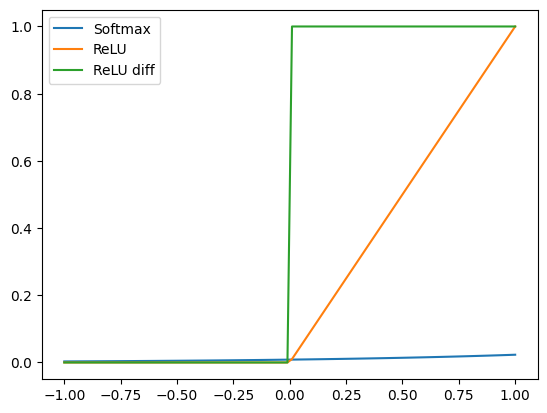

In [37]:
x = np.linspace(-1,1,100)
plt.plot(x,softmax(x),label="Softmax");
plt.plot(x,relu(x),label='ReLU');
plt.plot(x,relu_prime(x),label='ReLU diff');
plt.legend(loc='best');

In [6]:
softmax(x)

array([0.00312048, 0.00318416, 0.00324914, 0.00331545, 0.00338311,
       0.00345215, 0.0035226 , 0.00359449, 0.00366784, 0.00374269,
       0.00381907, 0.00389701, 0.00397654, 0.00405769, 0.00414049,
       0.00422499, 0.00431121, 0.00439919, 0.00448897, 0.00458058,
       0.00467406, 0.00476944, 0.00486677, 0.00496609, 0.00506744,
       0.00517085, 0.00527637, 0.00538405, 0.00549393, 0.00560604,
       0.00572045, 0.00583719, 0.00595631, 0.00607786, 0.0062019 ,
       0.00632846, 0.00645761, 0.00658939, 0.00672387, 0.00686108,
       0.0070011 , 0.00714398, 0.00728977, 0.00743853, 0.00759033,
       0.00774523, 0.00790329, 0.00806458, 0.00822916, 0.00839709,
       0.00856846, 0.00874332, 0.00892175, 0.00910382, 0.0092896 ,
       0.00947918, 0.00967263, 0.00987002, 0.01007144, 0.01027697,
       0.0104867 , 0.01070071, 0.01091908, 0.01114191, 0.01136929,
       0.01160131, 0.01183806, 0.01207965, 0.01232616, 0.01257771,
       0.01283439, 0.01309631, 0.01336357, 0.01363628, 0.01391

In [38]:
x = np.random.normal(loc=0,scale=1,size=(7,64))
x.shape
x_x_2 = np.divide(np.exp(x),np.sum(np.exp(x),axis=0))
np.sum(x_x_2[:,0])

1.0

In [39]:
y = np.random.normal(loc=0,scale=1,size=(7,))
np.sum(np.divide(np.exp(y),np.sum(np.exp(y),axis=0)))

1.0